### PREPROCESSING OF GERMAN CREDIT DATASET

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import imblearn
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
loaded_data = pd.read_csv('german.data', sep = " ", header=None)
german_data = loaded_data
print(german_data)

      0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0    A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1    A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2    A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3    A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4    A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   
..   ...  ..  ...  ...   ...  ...  ...  ..  ...   ...  ...   ...  ..   ...   
995  A14  12  A32  A42  1736  A61  A74   3  A92  A101  ...  A121  31  A143   
996  A11  30  A32  A41  3857  A61  A73   4  A91  A101  ...  A122  40  A143   
997  A14  12  A32  A43   804  A61  A75   4  A93  A101  ...  A123  38  A143   
998  A11  45  A32  A43  1845  A61  A73   4  A93  A101  ...  A124  23  A143   
999  A12  45  A34  A41  4576  A62  A71   3  A93  A101  ...  A123  27  A143   

       14 15    16 17    18    19 20  
0    A152  2  A173  1  A

In [3]:
german_data.to_csv('german.data', header=["stat_check_acc", "duration_month", "credit_history", "purpose", "credit_amount", "savings_bonds",
                                          "employment_since", "installment_in_percent", "sex", "debtors_guarant", "residence_since",
                                          "property","age", "other_installment_plans", "housing", "nr_credits", "job", "nr_dependants", "phone", "foreign_worker", "approval"], index=False)

In [4]:
german_data = pd.read_csv('german.data', sep = ",")
print(german_data)

    stat_check_acc  duration_month credit_history purpose  credit_amount  \
0              A11               6            A34     A43           1169   
1              A12              48            A32     A43           5951   
2              A14              12            A34     A46           2096   
3              A11              42            A32     A42           7882   
4              A11              24            A33     A40           4870   
..             ...             ...            ...     ...            ...   
995            A14              12            A32     A42           1736   
996            A11              30            A32     A41           3857   
997            A14              12            A32     A43            804   
998            A11              45            A32     A43           1845   
999            A12              45            A34     A41           4576   

    savings_bonds employment_since  installment_in_percent  sex  \
0             A65   

In [5]:
german_data["marital_status"] = german_data["sex"] 

In [6]:
#1= MALE 2=FEMALE 
german_data['sex'] = german_data['sex'].replace(['A91','A93','A94', 'A92','A95'],['male','male','male','female','female'])

In [7]:
german_data['approval'] = german_data['approval'].replace([1,2],[1,0])

In [8]:
# 1: ... < 0 DM
# 2: 0 <=... < 200 DM
# 3: ... >= 200 DM
# 4: no checking account
german_data['stat_check_acc'] = german_data['stat_check_acc'].replace(['A11','A12','A13', 'A14'],[1,2,3,4])
german_data[['stat_check_acc']] = german_data[['stat_check_acc']].apply(pd.to_numeric)

# A30 : no credits taken/  all credits paid back duly
# A31 : all credits at this bank paid back duly
# A32 : existing credits paid back duly till now
# A33 : delay in paying off in the past
# A34 : critical account/ other credits existing (not at this bank)

german_data['credit_history'] = german_data['credit_history'].replace(['A30','A31','A32','A33', "A34"],[1,2,3,4,5])
german_data[['credit_history']] = german_data[['credit_history']].apply(pd.to_numeric)

# 1 : car (new)
# 2 : car (used)
# 3 : furniture/equipment
# 4 : radio/television
# 5 : domestic appliances
# 6 : repairs
# 7 : education
# 8 : (vacation - does not exist?)
# 9 : retraining
# 10: business
# 11 : others

### FOR FURTHER DETAILS, CHECK DATA DECRIPTION DOC###

german_data['purpose'] = german_data['purpose'].replace(['A40','A41','A42','A43', "A44", 'A45', 'A46', 'A47', 'A48', 'A49', 'A410'],[1,2,3,4,5,6,7,8,9,10,11])
german_data[['purpose']] = german_data[['purpose']].apply(pd.to_numeric)

german_data['savings_bonds'] = german_data['savings_bonds'].replace(['A61','A62','A63', 'A64', 'A65'],[1,2,3,4,5])
german_data['savings_bonds'] = german_data['savings_bonds'].apply(pd.to_numeric)

german_data['employment_since'] = german_data['employment_since'].replace(['A71','A72','A73', 'A74', 'A75'],[1,2,3,4,5])
german_data['employment_since'] = german_data['employment_since'].apply(pd.to_numeric)

german_data['debtors_guarant'] = german_data['debtors_guarant'].replace(['A101','A102','A103'],[1,2,3])
german_data['debtors_guarant'] = german_data['debtors_guarant'].apply(pd.to_numeric)

german_data['property'] = german_data['property'].replace(['A121','A122','A123', 'A124'],[1,2,3,4])
german_data['property'] = german_data['property'].apply(pd.to_numeric)

german_data['other_installment_plans'] = german_data['other_installment_plans'].replace(['A141','A142','A143'],[1,2,3])
german_data['other_installment_plans'] = german_data['other_installment_plans'].apply(pd.to_numeric)

german_data['housing'] = german_data['housing'].replace(['A151','A152','A153'],[1,2,3])
german_data['housing'] = german_data['housing'].apply(pd.to_numeric)

german_data['job'] = german_data['job'].replace(['A171','A172','A173', 'A174'],[1,2,3,4])
german_data['job'] = german_data['job'].apply(pd.to_numeric)

german_data['phone'] = german_data['phone'].replace(['A191','A192'],[1,2])
german_data['phone'] = german_data['phone'].apply(pd.to_numeric)

german_data['foreign_worker'] = german_data['foreign_worker'].replace(['A201','A202'],[1,2])
german_data['foreign_worker'] = german_data['foreign_worker'].apply(pd.to_numeric)


#1 = DIVORCED/SEPARATED/MARRIED
#2 = SINGLE
german_data['marital_status'] = german_data['marital_status'].replace(['A91','A92','A93', 'A94', 'A95'],[1,1,2,1,2])
german_data['marital_status'] = german_data['marital_status'].apply(pd.to_numeric)

german_data['sex'] = german_data['sex'].replace(['male','female'],[0,1])
german_data['sex'] = german_data['sex'].apply(pd.to_numeric)

In [9]:
category =pd.cut(german_data.age,bins=[0,49,100],labels=[0, 1])
german_data.insert(5,'Age Group',category)
del german_data['age']

In [10]:
del german_data["foreign_worker"]
del german_data["marital_status"] 


In [11]:
print(german_data)

     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 1               6               5        4           1169   
1                 2              48               3        4           5951   
2                 4              12               5        7           2096   
3                 1              42               3        3           7882   
4                 1              24               4        1           4870   
..              ...             ...             ...      ...            ...   
995               4              12               3        3           1736   
996               1              30               3        2           3857   
997               4              12               3        4            804   
998               1              45               3        4           1845   
999               2              45               5        2           4576   

    Age Group  savings_bonds  employment_since  ins

In [12]:
german_data.isnull().values.any()

False

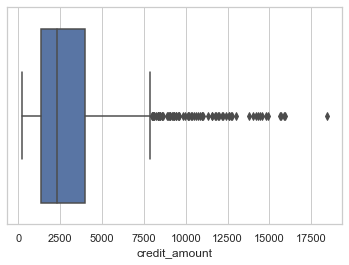

In [13]:
import seaborn as sns
sns.boxplot(x=german_data['credit_amount'])

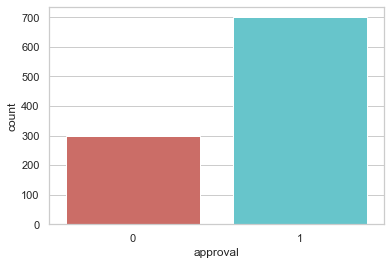

<Figure size 432x288 with 0 Axes>

In [15]:
sns.countplot(x ='approval', data = german_data, palette = 'hls')
plt.show()
plt.savefig('approval')

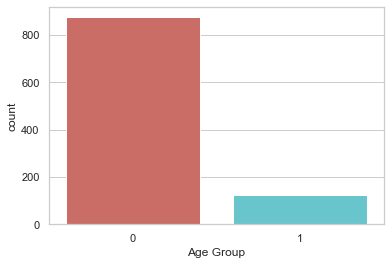

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x ='Age Group', data = german_data, palette = 'hls')
plt.show()
plt.savefig('approval')

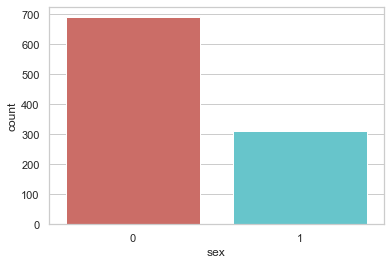

<Figure size 432x288 with 0 Axes>

In [17]:
sns.countplot(x ='sex', data = german_data, palette = 'hls')
plt.show()
plt.savefig('approval')

In [ ]:
german_data.to_csv(r'C:\Users\Majda\Downloads\Documents\MSc DSS\Thesis\german_data.csv',index = False, header=True)